/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

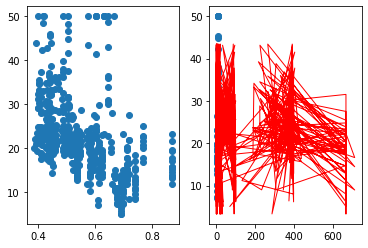

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

boston = load_boston()
columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

x=df.drop(columns=["target"])
columns_name=x.columns.tolist()
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_
result=""
result+=str(w0)+""
for i in range(len(w1)):
  result+="+ "+str(w1[i])+" " + columns_name[i]+" "
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1,2)
ax[0].scatter(x['NOX'], y)
ax[1].scatter(X_test["RM"], y_test)
ax[1].plot(X_test, y_pred, color='red', linewidth=1);
plt.show()

In [69]:
w0 = model.intercept_
w1 = model.coef_
result=""
result+=str(w0)+""
for i in range(len(w1)):
  result+="+ "+str(w1[i])+" " + columns_name[i]+" "
result

'40.12092427641083+ -0.10573020640943659 CRIM + 0.03884872900922619 ZN + 0.07628388726941737 INDUS + 1.3737611247224994 CHAS + -21.166073612439995 NOX + 3.8612239450571733 RM + -0.0007327833179464702 AGE + -1.5534299066170503 DIS + 0.30626101269336964 RAD + -0.013198021509450333 TAX + -1.0235768800420257 PTRATIO + 0.008165677352095519 B + -0.523216490677809 LSTAT '

In [71]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
#\Небольшое квадратичное отклонение (дисперсия) и абсолютное
#R2>0 модель работает исправно

Mean Absolute Error: 3.4555036605658858
Mean Squared Error: 22.698928483697216
R2 score: 0.7175134175608662


In [72]:
b=(y_test-y_pred)**2
print(sum(b)/len(b))



22.698928483697223
